In [1]:
import numpy as np
import pandas as pd

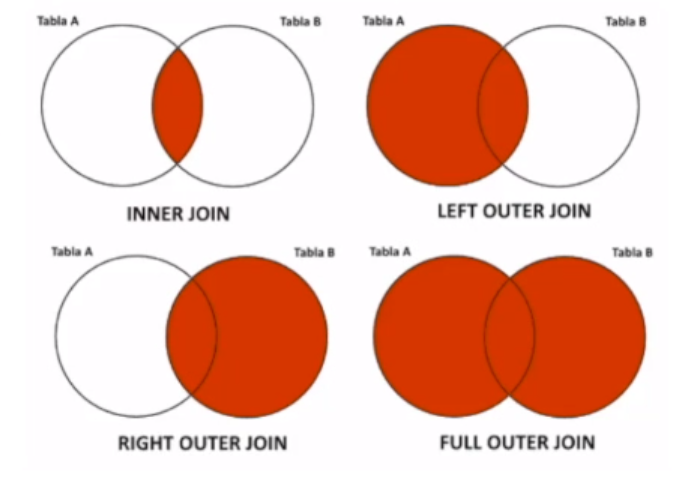

### ```pd.merge()``` permite realizar joins entre tablas, se puede hacer sobre filas o columnas

* Fusionar dos conjuntos de datos es el proceso de unir dos conjuntos de datos en uno y alinear las filas de cada uno en función de atributos o columnas comunes.

* Como se puede ver en la img: *inner join* arroja un dataframe con los elementos(registros/filas/columnas) coumunes entre dos DFs
* *outer join* realiza una unión de dataframes (muestra todos los registros)
* *left join*  arroja un df con los registros que se repiten en dos DFs basados en el df de la izquierda.
* *right join*  arroja un df con los registros que se repiten en dos DFs basados en el df de la derecha.

* El parámetro on=[*columnas*] indica en que columnas queremos que se muestre el join

* Una etiqueta son los datos de la columna en común

In [2]:
df = pd.DataFrame({
    'Mes': ['Ene', 'Feb', 'Mar', 'Abril'],
    'Ventas': [12, 13, 5, 10]
})

df2 = pd.DataFrame({
    'Mes': ['Feb', 'Ene', 'Mar', 'May'],
    'Valor': [5000, 7000, 9000, 12000]
})

df

,Mes,Ventas
0,Ene,12
1,Feb,13
2,Mar,5
3,Abril,10


In [3]:
df2

,Mes,Valor
0,Feb,5000
1,Ene,7000
2,Mar,9000
3,May,12000


### Ambos DataFrames tienen una columna en común (Mes) y varias **filas** comunes (Ene, Feb y Mar); en df los meses están organizados; en df 'Ene' tiene index=0 y en df2 tiene index=1

* Si hacemos un pd.merge, por defecto se hace un inner join o intersección (solo considera las **filas** con etiquetas comunes)

In [4]:
#Como se vev se unieron las columnas 'Ventas' y 'Valor' en una tabla, teniendo en cuenta la columna en común 'Mes'
pd.merge(df,df2)

,Mes,Ventas,Valor
0,Ene,12,7000
1,Feb,13,5000
2,Mar,5,9000


### Para obtener todos los registros se debe usar el tipo de join: 'outer' o unión; eso se hace con how='outer'

In [5]:
#Como vemos May no existe en Ventas(columna asociada al df) por lo que se llena con NaN, y Abr no existe en Valor(Columna asociada a df2)
pd.merge(df, df2, how='outer')

,Mes,Ventas,Valor
0,Ene,12.0,7000.0
1,Feb,13.0,5000.0
2,Mar,5.0,9000.0
3,Abril,10.0,NaN
4,May,NaN,12000.0


In [6]:
df['Mes'].dtypes

dtype('O')

In [7]:
#Aquí se puede ver que se basó en los registros del df de la izquierda y lo juntó con las columnas que tienen en común
#Obsérvese que Valor en Abril es nulo (NaN) ya que Abril no es un mes en común para ambos DFs, solo existe para el left, pero para el roght no
pd.merge(df, df2, how='left')

,Mes,Ventas,Valor
0,Ene,12,7000.0
1,Feb,13,5000.0
2,Mar,5,9000.0
3,Abril,10,NaN


In [8]:
pd.merge(df, df2, how='right', on=["Mes"])

,Mes,Ventas,Valor
0,Feb,13.0,5000
1,Ene,12.0,7000
2,Mar,5.0,9000
3,May,NaN,12000


In [9]:
pd.merge(df, df2, how='right', on=['Mes'])

,Mes,Ventas,Valor
0,Feb,13.0,5000
1,Ene,12.0,7000
2,Mar,5.0,9000
3,May,NaN,12000


In [10]:
ciudadesDF = ['London', 'Bogotá', 'Barcelona', 'Berna']
ciudadesDF2 = ['Berna', 'Orlando', 'London', 'Madrid']

df['Ciudades'] = ciudadesDF
df2['Ciudades'] = ciudadesDF2

In [11]:
df

,Mes,Ventas,Ciudades
0,Ene,12,London
1,Feb,13,Bogotá
2,Mar,5,Barcelona
3,Abril,10,Berna


In [12]:
df2

,Mes,Valor,Ciudades
0,Feb,5000,Berna
1,Ene,7000,Orlando
2,Mar,9000,London
3,May,12000,Madrid


In [13]:
pd.merge(df, df2 , how='inner', on=['Ciudades', 'Mes'])

,Mes,Ventas,Ciudades,Valor


In [14]:
pd.merge(df, df2, how='left')

,Mes,Ventas,Ciudades,Valor
0,Ene,12,London,NaN
1,Feb,13,Bogotá,NaN
2,Mar,5,Barcelona,NaN
3,Abril,10,Berna,NaN


### Usando ```pd.concat``` para juntar dataframes

In [15]:
anexoDF1 = pd.DataFrame({
    'Mes': ['Agosto'],
    'Ventas': [20],
    'Ciudades': ['Barcelona']
})

df = pd.concat([df, anexoDF1]) #por defecto usa axis=0


In [16]:
df

,Mes,Ventas,Ciudades
0,Ene,12,London
1,Feb,13,Bogotá
2,Mar,5,Barcelona
3,Abril,10,Berna
0,Agosto,20,Barcelona


In [17]:
df2

,Mes,Valor,Ciudades
0,Feb,5000,Berna
1,Ene,7000,Orlando
2,Mar,9000,London
3,May,12000,Madrid


In [18]:
df.index = range(df.shape[0])
df

,Mes,Ventas,Ciudades
0,Ene,12,London
1,Feb,13,Bogotá
2,Mar,5,Barcelona
3,Abril,10,Berna
4,Agosto,20,Barcelona


In [19]:
anexoDF2 = pd.DataFrame({
    'Mes': ['Agosto'],
    'Valor': [90],
    'Ciudades': ['Barcelona']
})
df2 = pd.concat([df2, anexoDF2])

In [20]:
df2

,Mes,Valor,Ciudades
0,Feb,5000,Berna
1,Ene,7000,Orlando
2,Mar,9000,London
3,May,12000,Madrid
0,Agosto,90,Barcelona


In [21]:
## Probando pd.concat con axis=1
from datetime import date
anexoDF1AXIS = pd.DataFrame({
    'Fecha': np.random.rand(5),
    'Cliente': ['Johan', 'Sebastián','Posada', 'Beltrán', 'Marina']
})
testing = pd.concat([df, anexoDF1AXIS], axis=1)

In [22]:
testing

,Mes,Ventas,Ciudades,Fecha,Cliente
0,Ene,12,London,0.044307,Johan
1,Feb,13,Bogotá,0.582954,Sebastián
2,Mar,5,Barcelona,0.693982,Posada
3,Abril,10,Berna,0.433096,Beltrán
4,Agosto,20,Barcelona,0.749077,Marina


In [23]:
pd.merge(df, df2, how='inner', on=['Mes'])

,Mes,Ventas,Ciudades_x,Valor,Ciudades_y
0,Ene,12,London,7000,Orlando
1,Feb,13,Bogotá,5000,Berna
2,Mar,5,Barcelona,9000,London
3,Agosto,20,Barcelona,90,Barcelona


In [24]:
pd.merge(df, df2, how='inner', on=['Ciudades'])

,Mes_x,Ventas,Ciudades,Mes_y,Valor
0,Ene,12,London,Mar,9000
1,Mar,5,Barcelona,Agosto,90
2,Agosto,20,Barcelona,Agosto,90
3,Abril,10,Berna,Feb,5000


In [25]:
pd.merge(df, df2, how='outer', on=['Mes'])

,Mes,Ventas,Ciudades_x,Valor,Ciudades_y
0,Ene,12.0,London,7000.0,Orlando
1,Feb,13.0,Bogotá,5000.0,Berna
2,Mar,5.0,Barcelona,9000.0,London
3,Abril,10.0,Berna,NaN,NaN
4,Agosto,20.0,Barcelona,90.0,Barcelona
5,May,NaN,NaN,12000.0,Madrid


In [26]:
pd.merge(df, df2, how='right', on=['Mes'])

,Mes,Ventas,Ciudades_x,Valor,Ciudades_y
0,Feb,13.0,Bogotá,5000,Berna
1,Ene,12.0,London,7000,Orlando
2,Mar,5.0,Barcelona,9000,London
3,May,NaN,NaN,12000,Madrid
4,Agosto,20.0,Barcelona,90,Barcelona


In [27]:
pd.merge(df, df2, how='left', on=['Mes'])

,Mes,Ventas,Ciudades_x,Valor,Ciudades_y
0,Ene,12,London,7000.0,Orlando
1,Feb,13,Bogotá,5000.0,Berna
2,Mar,5,Barcelona,9000.0,London
3,Abril,10,Berna,NaN,NaN
4,Agosto,20,Barcelona,90.0,Barcelona


In [28]:
# Create Population DataFrame
DF1 = pd.DataFrame({
    'Country': ['America', 'Indonesia', 'France'],
    'Location': ['New York', 'Jakarta', 'Paris'],
    'Population': [731800, 575030, 183305]
})

# Create Income DataFrame
DF2 = pd.DataFrame({
    'Country': ['America', 'America', 'Indonesia', 'India', 'France', 'Greece'],
    'Location': ['New York', 'Chicago', 'Jakarta', 'Mumbai', 'Paris', 'Yunani'],
    'Income': [1000, 1500, 1400, 1100, 900, 1200]
    
})

# Merge Dataframe
merged_df = pd.merge(DF1, DF2, on=['Location'])
merged_df

,Country_x,Location,Population,Country_y,Income
0,America,New York,731800,America,1000
1,Indonesia,Jakarta,575030,Indonesia,1400
2,France,Paris,183305,France,900


### Usando ```.join()```

In [29]:
join = DF1.join(DF2.set_index(['Country']), lsuffix='_left', rsuffix='_right')
join

,Country,Location_left,Population,Location_right,Income
0,America,New York,731800,NaN,NaN
1,Indonesia,Jakarta,575030,NaN,NaN
2,France,Paris,183305,NaN,NaN


In [30]:
join = DF1.join(DF2.set_index(['Country']), lsuffix='_left', rsuffix='_right', on=['Country'])
join

,Country,Location_left,Population,Location_right,Income
0,America,New York,731800,New York,1000
0,America,New York,731800,Chicago,1500
1,Indonesia,Jakarta,575030,Jakarta,1400
2,France,Paris,183305,Paris,900


In [31]:
join = DF1.join(DF2.set_index(['Country']), lsuffix='_left', rsuffix='_right')
join

,Country,Location_left,Population,Location_right,Income
0,America,New York,731800,NaN,NaN
1,Indonesia,Jakarta,575030,NaN,NaN
2,France,Paris,183305,NaN,NaN


In [32]:
join = DF1.join(DF2.set_index(['Country']), lsuffix='_left', rsuffix='_right', on='Country')
join

,Country,Location_left,Population,Location_right,Income
0,America,New York,731800,New York,1000
0,America,New York,731800,Chicago,1500
1,Indonesia,Jakarta,575030,Jakarta,1400
2,France,Paris,183305,Paris,900


In [33]:
join = DF1.join(DF2.set_index(['Country', 'Location']), lsuffix='_left', rsuffix='_right', on=['Country', 'Location'])
join

,Country,Location,Population,Income
0,America,New York,731800,1000
1,Indonesia,Jakarta,575030,1400
2,France,Paris,183305,900


In [34]:
settingIndex = DF1.set_index(['Country'])
settingIndex

,Location,Population
Country,,
America,New York,731800
Indonesia,Jakarta,575030
France,Paris,183305


In [43]:
grby = df.groupby(['Ciudades', 'Ventas'])
grby.first()

Mes
Ciudades  Ventas        
Barcelona 5          Mar
          20      Agosto
Berna     10       Abril
Bogotá    13         Feb
London    12         Ene